In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [29]:
import bz2
import os
import ujson
import attr
import math

import pandas as pd
import numpy as np

from glob import glob
from tqdm import tqdm_notebook
from itertools import islice
from collections import OrderedDict, defaultdict
from pyemd import emd
from boltons.iterutils import pairwise

from sklearn.cluster import AgglomerativeClustering
from scipy import stats

In [3]:
@attr.s
class Dataset:
    
    root = attr.ib()
    
    def paths(self):
        return glob(os.path.join(self.root, '*.bz2'))
    
    def novels(self):
        for path in tqdm_notebook(self.paths()):
            with bz2.open(path) as fh:
                for line in fh:
                    yield ujson.loads(line)

In [68]:
ds = Dataset('../../data/top200-100b.json/')

In [70]:
df = pd.DataFrame(ds.novels())

HBox(children=(IntProgress(value=0), HTML(value='')))

In [93]:
def plot_slices(token):
    
    plt.figure(figsize=(10,10))
    
    plt.title(token)
    
    plt.rc('axes', labelsize=16)
    plt.rc('axes', titlesize=16)
    
    plt.xlabel('Narrative time')
    plt.ylabel('Relative frequency')

    decade_splits = [
        (f'{y1}-{y2}', df[(df.pub_year >= y1) & (df.pub_year < y2)])
        for y1, y2 in pairwise(range(1850, 2001, 30))
    ]

    splits = OrderedDict([
        ('Gale', df[df.corpus=='gale']),
        ('Chicago', df[df.corpus=='chicago']),
        ('Male Authored', df[df.chicago_auth_gender=='M']),
        ('Female Authored', df[df.chicago_auth_gender=='F']),
        ('Canonical', df[df.chicago_auth_canon==True]),
        ('Non-Canonical', df[df.chicago_auth_canon==False]),
        *decade_splits,
        ('# Libraries < 500', df[df.chicago_libraries<500]),
        ('# Libraries 500-1000', df[(df.chicago_libraries>500) & (df.chicago_libraries<1000)]),
        ('# Libraries 1000+', df[df.chicago_libraries>1000]),
    ])

    for label, split in splits.items():
        series = np.stack(c[token] for c in split['counts']).sum(0)
        plt.plot(series / series.sum(), label=f'{label}  ({len(split)})')
        
    plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0)

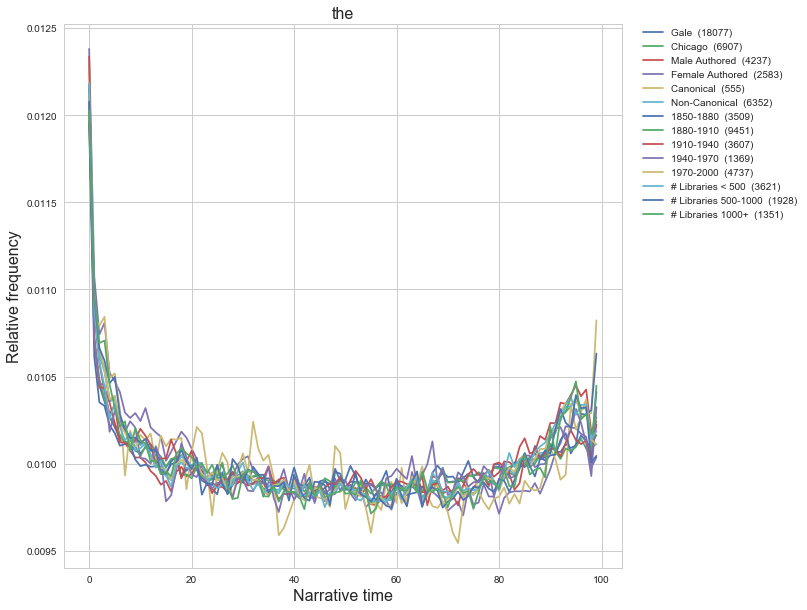

In [94]:
plot_slices('the')

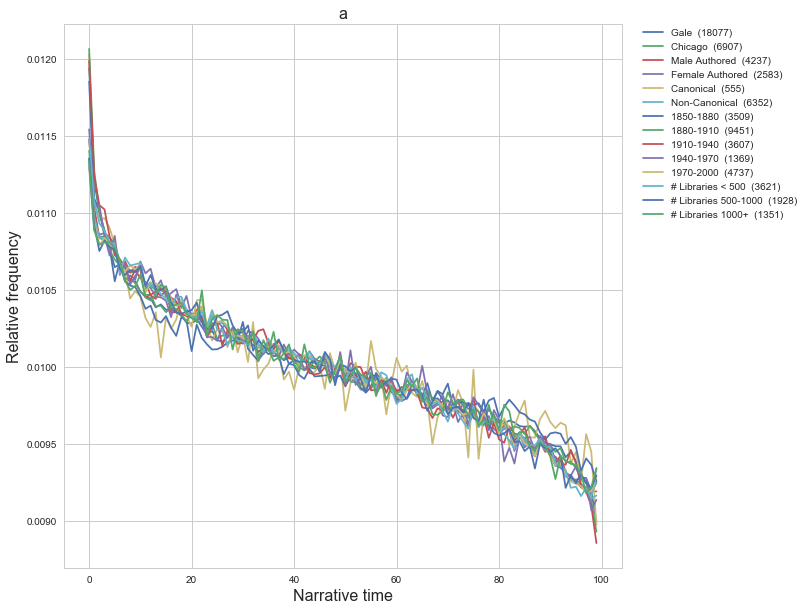

In [95]:
plot_slices('a')

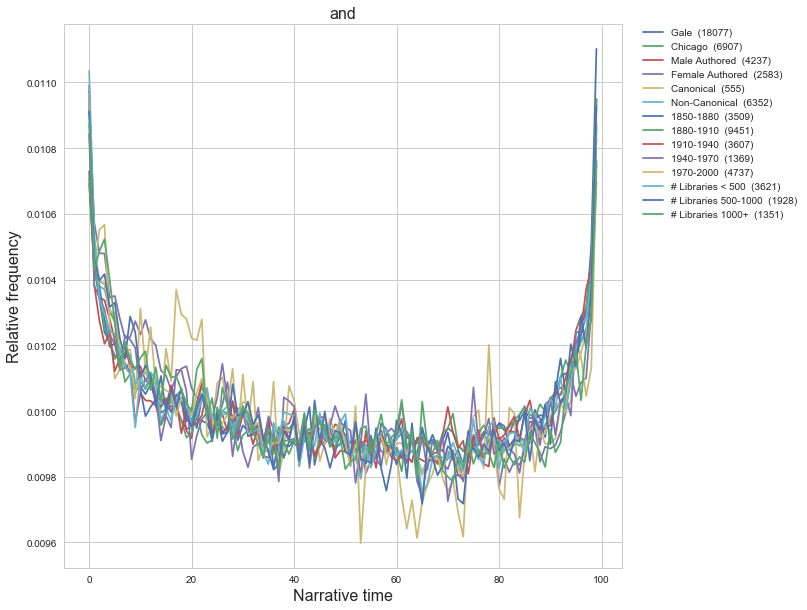

In [96]:
plot_slices('and')

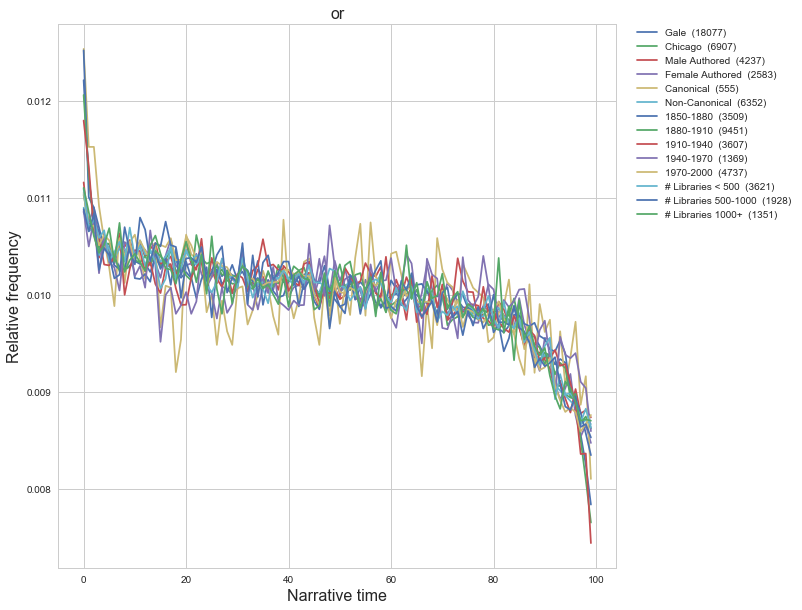

In [97]:
plot_slices('or')

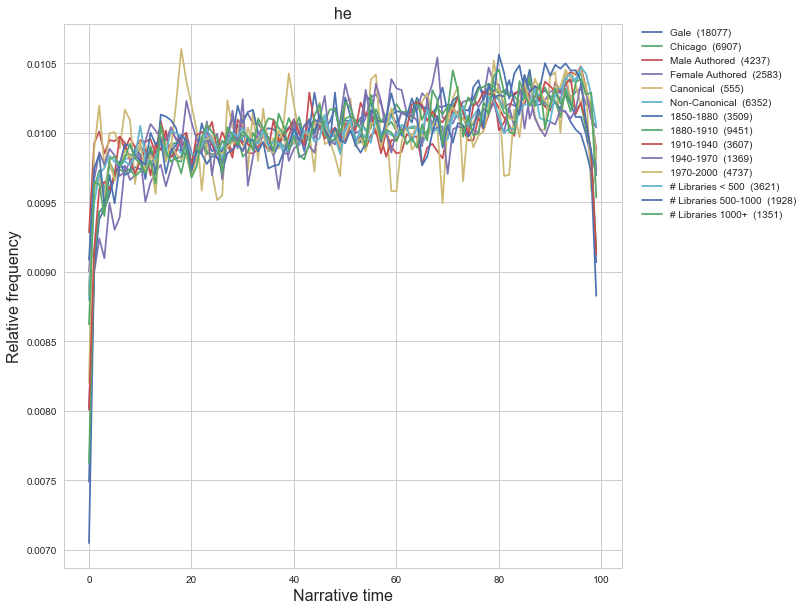

In [98]:
plot_slices('he')

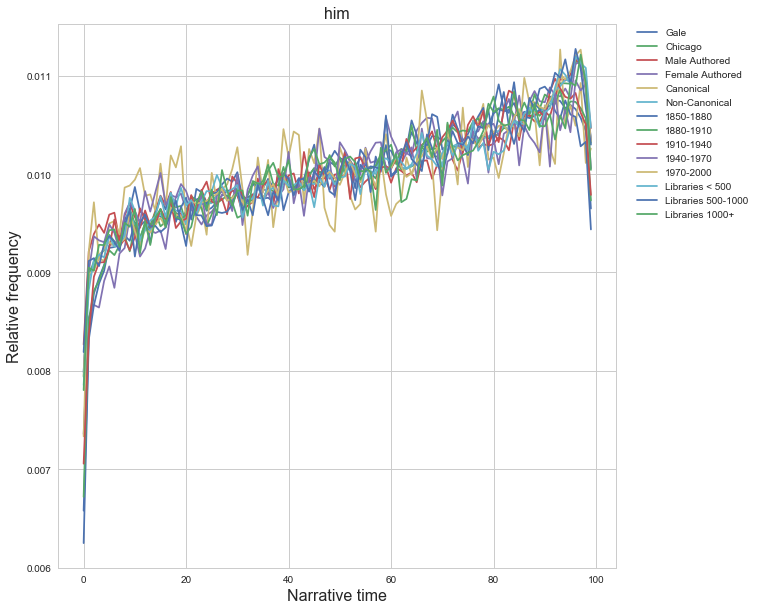

In [78]:
plot_slices('him')

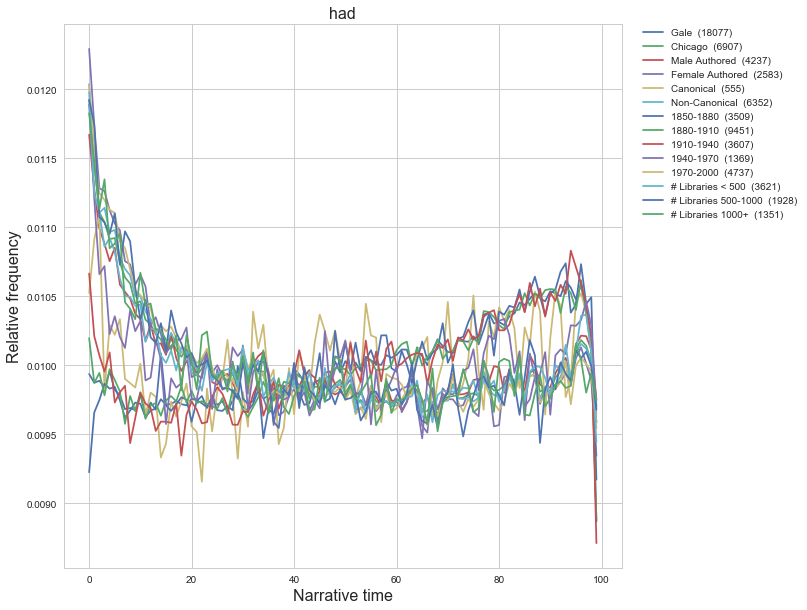

In [104]:
plot_slices('had')